# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Summary:
•	Correlation of Latitude and Maximum Temperature: Based on my observations the maximum temperatures are closer to the equator and as the latitude goes south or north of the Equator the temperatures drop. 	
•	Latitude vs. Humidity: There is no clear correlation between latitude and humidity. However there seems to be more humidity towards the north pole.
•	Latitude vs. Cloudiness: There is no clear correlation between latitude and cloudiness.
•	Latitude vs. Wind: There seems to be more wind activity north of the equator vs the south.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
link = "https://api.openweathermap.org/data/2.5/weather?"
link = f"{link}appid={api_key}&units=metric&q="

#set up lists hold data

location = []
clouds = []
country = []
date = []
humidity = []
lats = []
lngs = []
max_temp = []
wind = []

#set orgainizational variables
count = 0
current_set = 1

#collect data and store in lists
print("Beginning Data Retrieval\n-----------------------------")
for city in cities:
   try:
       data = requests.get(link+city).json()
       location.append(data["name"])
       clouds.append(data["clouds"]["all"])
       country.append(data["sys"]["country"])
       date.append(datetime.date.fromtimestamp(data["dt"]))
       humidity.append(data["main"]["humidity"])
       lats.append(data["coord"]["lat"])
       lngs.append(data["coord"]["lon"])
       max_temp.append(data["main"]["temp_max"])
       wind.append(data["wind"]["speed"])
       if count > 49:
           count = 1
           current_set += 1
       else:
           count += 1
       print(f"Processing record {count} of set {current_set} | {city}")
   except Exception:
       print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
                                                                          

Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | rikitea
Processing record 2 of set 1 | necochea
Processing record 3 of set 1 | catio
Processing record 4 of set 1 | moctezuma
City not found. Skipping...
Processing record 5 of set 1 | mataura
City not found. Skipping...
Processing record 6 of set 1 | hithadhoo
Processing record 7 of set 1 | saskylakh
Processing record 8 of set 1 | tarakan
Processing record 9 of set 1 | bandarbeyla
Processing record 10 of set 1 | nanakuli
Processing record 11 of set 1 | paamiut
Processing record 12 of set 1 | kapaa
Processing record 13 of set 1 | phan thiet
Processing record 14 of set 1 | chokurdakh
Processing record 15 of set 1 | carnarvon
Processing record 16 of set 1 | port elizabeth
Processing record 17 of set 1 | noumea
Processing record 18 of set 1 | najran
Processing record 19 of set 1 | arraial do cabo
Processing record 20 of set 1 | cabra
Processing record 21 of set 1 | narsaq
Processing record 22 of set 1 | 

City not found. Skipping...
Processing record 31 of set 4 | puerto madero
Processing record 32 of set 4 | lloydminster
Processing record 33 of set 4 | brasilia
City not found. Skipping...
Processing record 34 of set 4 | saint-augustin
Processing record 35 of set 4 | lebu
Processing record 36 of set 4 | mahebourg
Processing record 37 of set 4 | troitsko-pechorsk
Processing record 38 of set 4 | fukue
Processing record 39 of set 4 | bidhuna
Processing record 40 of set 4 | mogadishu
Processing record 41 of set 4 | fortuna
Processing record 42 of set 4 | tasiilaq
Processing record 43 of set 4 | shostka
Processing record 44 of set 4 | sao felix do xingu
Processing record 45 of set 4 | khatanga
Processing record 46 of set 4 | papetoai
Processing record 47 of set 4 | izmit
Processing record 48 of set 4 | teya
Processing record 49 of set 4 | ilam
Processing record 50 of set 4 | zhigansk
Processing record 1 of set 5 | havre
Processing record 2 of set 5 | dandong
City not found. Skipping...
Proce

Processing record 20 of set 8 | betong
Processing record 21 of set 8 | luanda
Processing record 22 of set 8 | rawson
City not found. Skipping...
Processing record 23 of set 8 | conakry
Processing record 24 of set 8 | itoman
Processing record 25 of set 8 | balkanabat
Processing record 26 of set 8 | brownsville
City not found. Skipping...
Processing record 27 of set 8 | tazovskiy
City not found. Skipping...
Processing record 28 of set 8 | heze
Processing record 29 of set 8 | talas
Processing record 30 of set 8 | sept-iles
Processing record 31 of set 8 | price
City not found. Skipping...
Processing record 32 of set 8 | lahaina
Processing record 33 of set 8 | hervey bay
Processing record 34 of set 8 | madimba
Processing record 35 of set 8 | sillod
Processing record 36 of set 8 | biak
Processing record 37 of set 8 | maragogi
Processing record 38 of set 8 | jiuquan
Processing record 39 of set 8 | mildura
Processing record 40 of set 8 | novyy yegorlyk
Processing record 41 of set 8 | khorixas


Processing record 1 of set 12 | kiama
Processing record 2 of set 12 | vedeno
Processing record 3 of set 12 | vanimo
City not found. Skipping...
Processing record 4 of set 12 | esperanza
Processing record 5 of set 12 | toamasina
Processing record 6 of set 12 | bykovo
Processing record 7 of set 12 | pangkalanbuun
Processing record 8 of set 12 | beloha
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = {"City": location,
     "Cloudiness": clouds,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Latitude": lats,
     "Longitude": lngs,
     "Max Temperature": max_temp,
     "Wind Speed": wind
}

#convert to dataframe
df = pd.DataFrame(df)
df.count()

City               558
Cloudiness         558
Country            558
Date               558
Humidity           558
Latitude           558
Longitude          558
Max Temperature    558
Wind Speed         558
dtype: int64

In [5]:
df.to_csv("../output_data/weather_data.csv")
df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Rikitea,6,PF,2019-09-28,86,-23.12,-134.97,22.96,5.00
1,Necochea,0,AR,2019-09-28,50,-38.55,-58.74,13.89,2.24
2,Catio,37,GW,2019-09-28,82,11.28,-15.25,26.74,4.28
3,Moctezuma,0,MX,2019-09-28,70,29.81,-109.68,19.09,1.36
4,Mataura,62,NZ,2019-09-28,66,-46.19,168.86,13.89,4.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

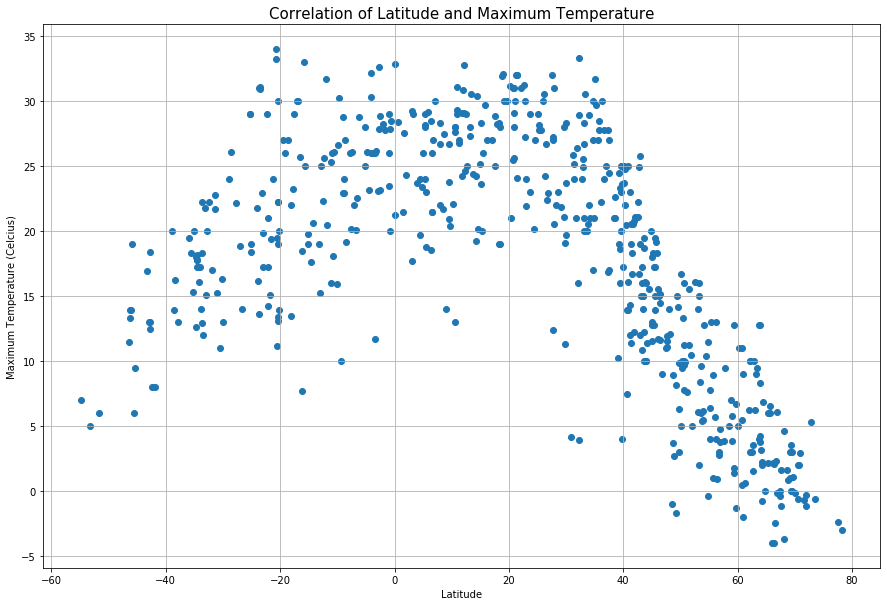

In [10]:
#create a plot based on latitude and max temp
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Max Temperature"])
#label graph
plt.title("Correlation of Latitude and Maximum Temperature", size=15)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (Celcius)")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")

#### Latitude vs. Humidity Plot

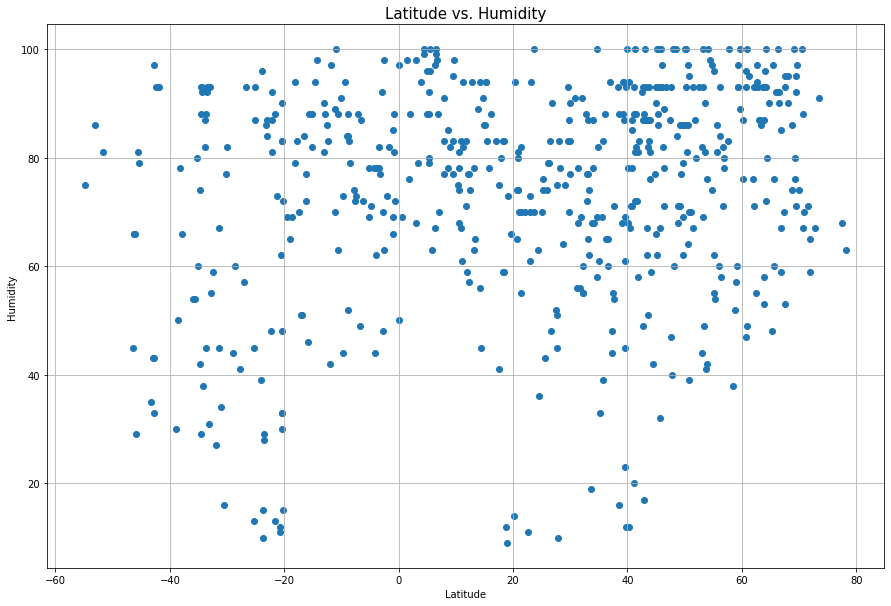

In [7]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Humidity"])
#label graph
plt.title("Latitude vs. Humidity", size=15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")

#### Latitude vs. Cloudiness Plot

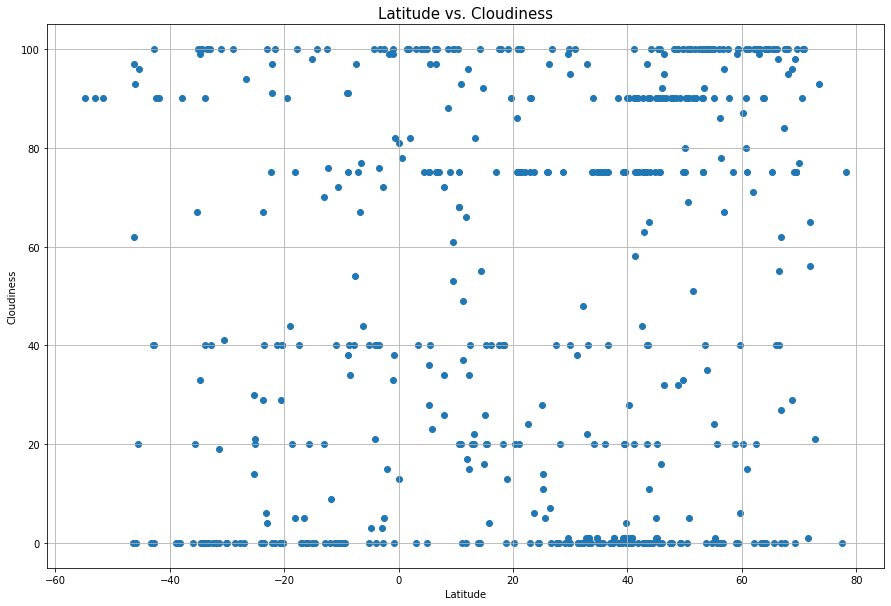

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Cloudiness"])
#label graph
plt.title("Latitude vs. Cloudiness", size=15)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")

#### Latitude vs. Wind Speed Plot

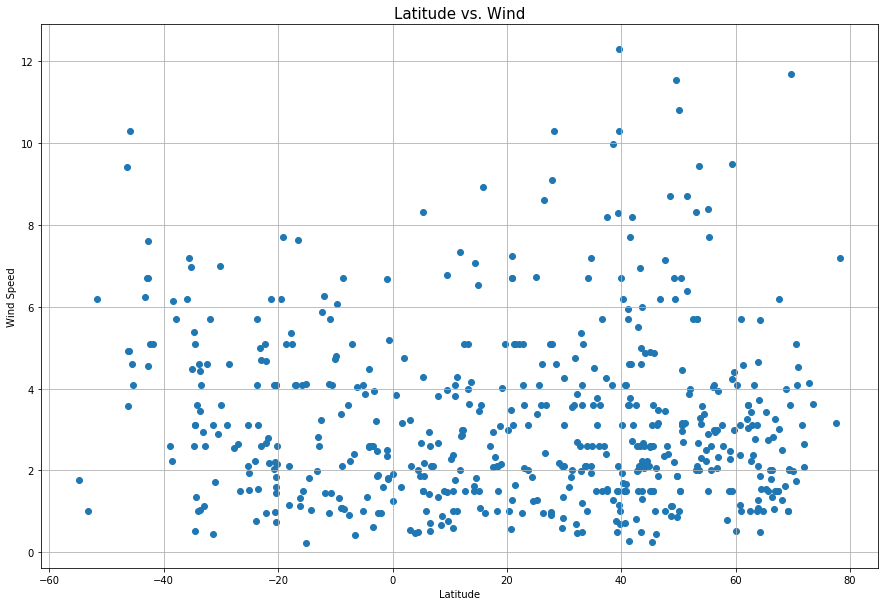

In [9]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x=df["Latitude"], y=df["Wind Speed"])
#label graph
    plt.title("Latitude vs. Wind", size=15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
#save as png
plt.savefig("../output_data/temp_scatter")